In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
# LOAD THE DATA
df = pd.read_csv("C:\\Users\\annma\\OneDrive\\Desktop\\oasis internship\\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#TO DELETE COLUMN ID
df=df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#TO DISPLAY BASIC INFO ABOUT DATATYPE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#TO DISPLAY NO. OF SAMPLES ON EACH CLASS
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
#CHECK FOR NULL VALUEES
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

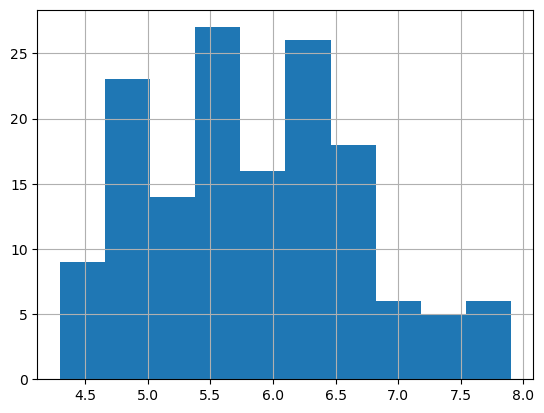

In [7]:
#HISTOGRAMS
df['SepalLengthCm'].hist()

<Axes: >

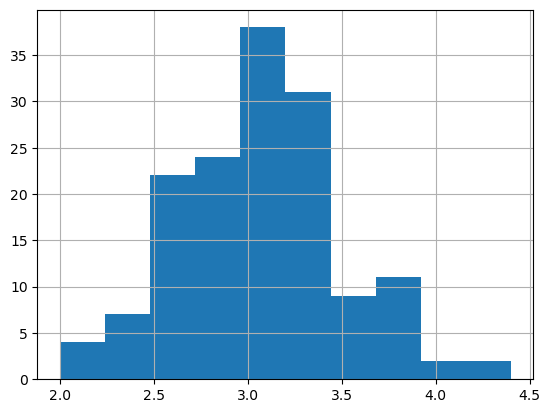

In [8]:
df['SepalWidthCm'].hist()

<Axes: >

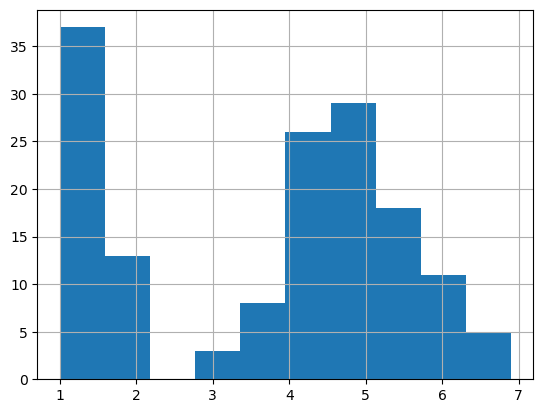

In [9]:
df['PetalLengthCm'].hist()

<Axes: >

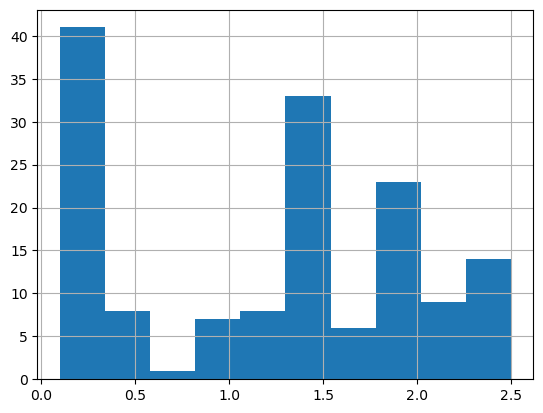

In [10]:
df['PetalWidthCm'].hist()

<Axes: >

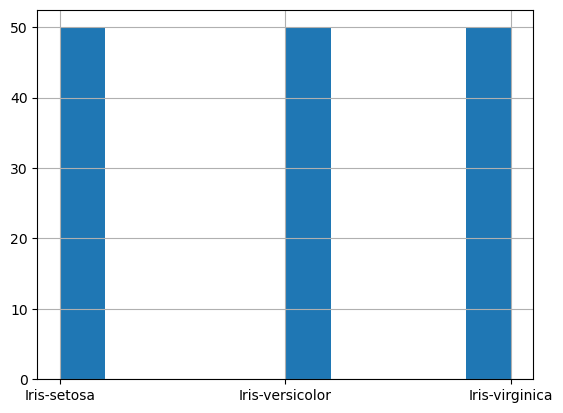

In [11]:
df['Species'].hist()

In [12]:
#SCATTERPLOT
colors=["red","orange","blue"]
Species=["Iris-setosa","Iris-versicolor","Iris-virginica"]

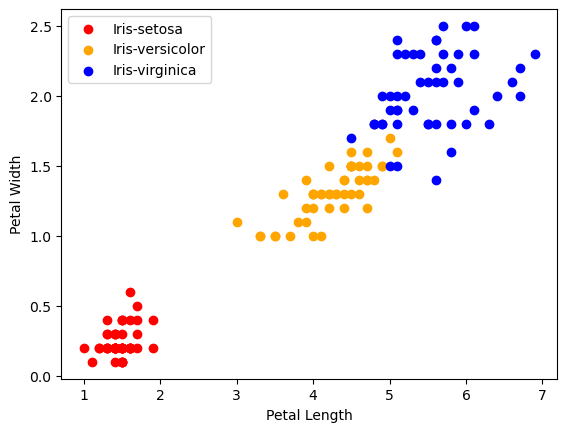

In [13]:
for i in range(3):
    x=df[df["Species"]==Species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=Species[i])
#TO LABEL X AXIS, Y AXIS AND CLASS
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

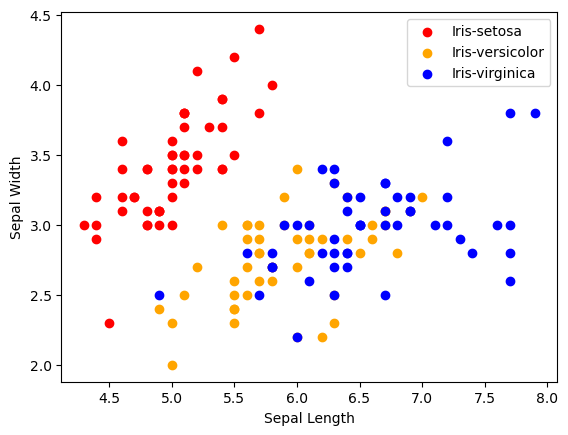

In [14]:
for i in range(3):
    x=df[df["Species"]==Species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=Species[i])
#TO LABEL X AXIS, Y AXIS AND CLASS
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

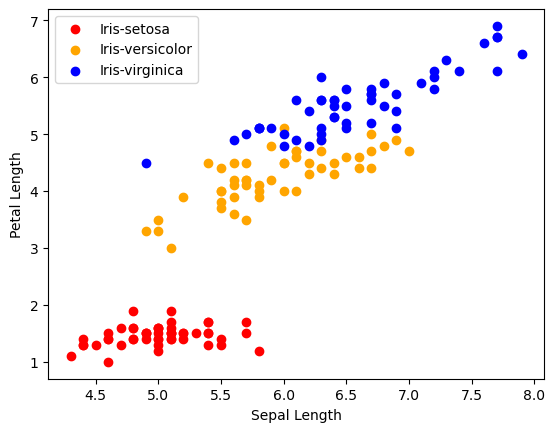

In [15]:
for i in range(3):
    x=df[df["Species"]==Species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=Species[i])
#TO LABEL X AXIS, Y AXIS AND CLASS
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

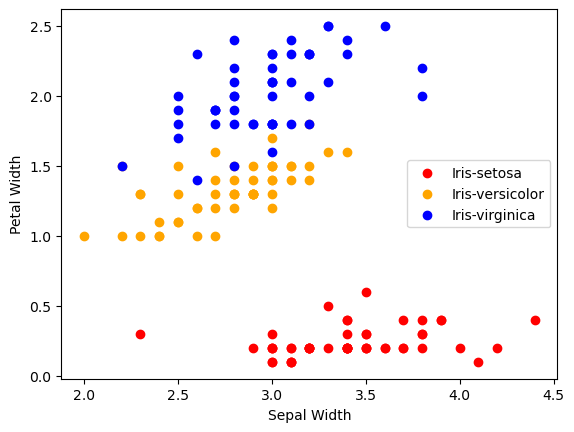

In [16]:
for i in range(3):
    x=df[df["Species"]==Species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=Species[i])
#TO LABEL X AXIS, Y AXIS AND CLASS
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [17]:
#COORELATION MATRIX
df.corr()

C:\Users\annma\AppData\Local\Temp\ipykernel_49236\2235779704.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


C:\Users\annma\AppData\Local\Temp\ipykernel_49236\2064279558.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

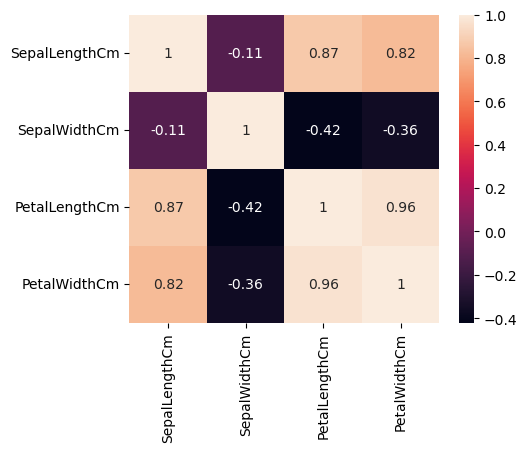

In [18]:
#DISPLAY AS HEAP MAP
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax)

In [19]:
#LABEL ENCODER
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
df['Species']=le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
#MODEL TRAINING
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Species'])
y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [22]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [23]:
model.fit(x_train,y_train)

LogisticRegression()

In [24]:
#PRINT METRIC TO GET PERFORMANCE
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  95.55555555555556


In [25]:
#K-NEAREST NEIGHBOURS
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [26]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [27]:
#PRINT METRIC TO GET PERFORMANCE
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  95.55555555555556


In [28]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [29]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
#PRINT METRIC TO GET PERFORMANCE
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  95.55555555555556


In [31]:
y_pred = model.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 95.55555555555556
